(notebooks)=

# Jupyter Notebooks

[NPF](https://github.com/tbarbette/npf/) can generate a Jupyter Notebook that contains code to plot graphs from the data of the experiments. This is a great starting point for your final graphs, or to adjust the output to your likings. Instead of playing with the settings of NPF, this allows you to configure your graphs in _Python_. The resulting notebook is adapted from a _Jinja_ template, depending on the type of graph that has to be generated.

## Command line parameters

| parameter                                        | description                                                  |
| ------------------------------------------------ | ------------------------------------------------------------ |
| [`--notebook <path>` / `--nb <path>`](#notebook) | Generate a Jupyter Notebook at the provided path.            |
| [`--update-nb`](#update)                         | Replace only the data if a notebook already exists.          |
| [`--force-nb`](#force)                           | Overwrite the file if a notebook already exists.             |
| [`--disable-nb-exec`](#exec)                     | Prevent the generated notebook from being executed.          |
| [`--template-nb <path>`](#template)              | Use a custom Jupyter Notebook as template.                   |
| [`--nb-kernel <kernel>`](#kernel)                | Specify which kernel should be used to execute the notebook. |

(notebook)=

### `--notebook <path>` / `--nb <path>`

Main argument to generate a notebook by providing the desired output path. A new _\*.ipynb_ file will be created but if one exists, the user gets prompted to know if it should be kept or overwritten (answer by typing _yes_ or _no_). The default action can be configured with [`--update-nb`](#update), or [`--force-nb`](#force).

(update)=

### `--update-nb`

This option defines the behavior when the provided path for the notebook points to an existing notebook. Instead of asking what to do, NPF will try to replace the data in the notebook with the most recent measurements. This is done, by replacing the cells that have the _data_ tag with `data = [...]` where `[...]` contains the results. No code will be lost, as long as no changes were made to any cell that has the _data_ tag.

(force)=

### `--force-nb`

This option defines the behavior when the provided path for the notebook points to an existing notebook. This is a way to force NPF to overwrite the existing file with a newly created one. Changes made to the existing file will be lost forever with this operation. Make sure the file doesn't contain any important changes.

:::{warning}
Any existing notebook at the given path will be overwritten and data may be lost.
:::

(exec)=

### `--disable-nb-exec`

By default, the generated notebook gets executed making it ready for analysis by providing cell outputs and displaying graphs. This behavior can be disabled using this parameter. The resulting notebook now has to be executed by the user.

(template)=

### `--template-nb <path>`

A template is used and converted into the final notebook generated by NPF. This template contains code for many types of graphs. With this parameter, you can provide a new template that will be used instead. The default path is located in the NPF project at [_npf/types/notebook/template.ipynb_](https://github.com/tbarbette/npf/blob/430612f2ceedaabc5697daad37624ac7e2cfb725/npf/types/notebook/template.ipynb) and this file can be used as starter for a custom one.

When creating a template, you are free to add whatever you like to it. Certain measures are required for a good processing of the template by NPF. The metadata tags of each cell are used to specify the cells that should be kept to plot a certain type of graph. Here is the list of string tags that get recognized by NPF : _all_, _data_, _line_, _simple_bar_, _barh_, _boxplot_, _cdf_, and _heatmap_. The _all_ tag will keep the cell whatever the chosen graph type is, and the _data_ tag identifies the cell that should only contain the data in `data = [...]` format (if the [`--update-nb`](#update) option is used, any other content of this cell will be erased).

[Jinja](https://jinja.palletsprojects.com) templating can be used to add some logic depending on the input data. Variables placed between double curly brackets (e.g., `{{ name }}`) get replaced by the corresponding values. Here's a list of the variables that are accessible inside the template:

| variable  | type       | description                                                                  |
| --------- | ---------- | ---------------------------------------------------------------------------- |
| name      | str        | The title of the experiment.                                                 |
| var_names | dict       | Dictionary of variables and their pretty name.                               |
| x_vars    | list[str]  | X-axis variables.                                                            |
| x_names   | list[str]  | X-axis variables' pretty names.                                              |
| y_vars    | list[str]  | Y-axis variables.                                                            |
| y_names   | list[str]  | Y-axis variables' pretty names.                                              |
| data      | list[dict] | Experiment measurements in a Pandas dataframe format.                        |
| dir_name  | str        | Output directory of the notebook (e.g., _npf/result_notebooks_).             |
| file_path | str        | Path of the file with no extension (e.g., _npf/result_notebooks/iperf2_nb_). |
| file_name | str        | Name of the file with no extension (e.g., _iperf2_nb_).                      |

(kernel)=

### `--nb-kernel <kernel>`

By default, the produced notebook gets executed (can be changed with [`--disable-nb-exec`](#exec)). The kernel used for the execution is by default, set to _python3_, but with this option you can specify the one that should be used.

## How to generate a notebook

When running NPF, set the `--notebook <path>` parameter where `<path>` is the path for the \*_.ipynb_ file. The created notebook contains code to plot simple graphs that can be adapted manually and also the data of the experiment. This code depends on the graph type which can be forced using `--config graph_type=<type>` where `<type>` can be _line_, _simple_bar_, _barh_ (horizontal bar), _boxplot_, _cdf_, or _heatmap_.

The following [Jupyter Notebook](#example) can be obtained by running the example _iperf_ test of NPF with the following command:

```
npf-run --test tests/tcp/01-iperf.npf --notebook iperf-nb.ipynb --config graph_type=bar
```

Once the experiment data has been collected by NPF, the notebook will be created and saved at the provided file path.

---


(example)=

## Example notebook of IPerf 2 Throughput Experiment


In [1]:
data = [{"build": "2.0.9", "test_index": 0, "PARALLEL": 1, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 15461882265.6, "run_index": 0}, {"build": "2.0.9", "test_index": 0, "PARALLEL": 1, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 15461882265.6, "run_index": 1}, {"build": "2.0.9", "test_index": 0, "PARALLEL": 1, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 15247133900.8, "run_index": 2}, {"build": "2.0.9", "test_index": 0, "PARALLEL": 1, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 15139759718.4, "run_index": 3}, {"build": "2.0.9", "test_index": 0, "PARALLEL": 1, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 16106127360.0, "run_index": 4}, {"build": "2.0.9", "test_index": 1, "PARALLEL": 2, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 27165668147.2, "run_index": 0}, {"build": "2.0.9", "test_index": 1, "PARALLEL": 2, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 24588687769.6, "run_index": 1}, {"build": "2.0.9", "test_index": 1, "PARALLEL": 2, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 24803436134.4, "run_index": 2}, {"build": "2.0.9", "test_index": 1, "PARALLEL": 2, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 25232932864.0, "run_index": 3}, {"build": "2.0.9", "test_index": 1, "PARALLEL": 2, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 26628797235.2, "run_index": 4}, {"build": "2.0.9", "test_index": 2, "PARALLEL": 3, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 32641751449.6, "run_index": 0}, {"build": "2.0.9", "test_index": 2, "PARALLEL": 3, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 33393370726.4, "run_index": 1}, {"build": "2.0.9", "test_index": 2, "PARALLEL": 3, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 32963873996.8, "run_index": 2}, {"build": "2.0.9", "test_index": 2, "PARALLEL": 3, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 33071248179.2, "run_index": 3}, {"build": "2.0.9", "test_index": 2, "PARALLEL": 3, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 33178622361.6, "run_index": 4}, {"build": "2.0.9", "test_index": 3, "PARALLEL": 4, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 41124311859.2, "run_index": 0}, {"build": "2.0.9", "test_index": 3, "PARALLEL": 4, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 39513699123.2, "run_index": 1}, {"build": "2.0.9", "test_index": 3, "PARALLEL": 4, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 42949672960.0, "run_index": 2}, {"build": "2.0.9", "test_index": 3, "PARALLEL": 4, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 43916040601.6, "run_index": 3}, {"build": "2.0.9", "test_index": 3, "PARALLEL": 4, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 45097156608.0, "run_index": 4}, {"build": "2.0.9", "test_index": 4, "PARALLEL": 5, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 46922517708.8, "run_index": 0}, {"build": "2.0.9", "test_index": 4, "PARALLEL": 5, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 49606872268.8, "run_index": 1}, {"build": "2.0.9", "test_index": 4, "PARALLEL": 5, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 50573239910.4, "run_index": 2}, {"build": "2.0.9", "test_index": 4, "PARALLEL": 5, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 52398601011.2, "run_index": 3}, {"build": "2.0.9", "test_index": 4, "PARALLEL": 5, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 56693568307.2, "run_index": 4}, {"build": "2.0.9", "test_index": 5, "PARALLEL": 6, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 77953656422.4, "run_index": 0}, {"build": "2.0.9", "test_index": 5, "PARALLEL": 6, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 78275778969.6, "run_index": 1}, {"build": "2.0.9", "test_index": 5, "PARALLEL": 6, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 79349520793.6, "run_index": 2}, {"build": "2.0.9", "test_index": 5, "PARALLEL": 6, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 81604378624.0, "run_index": 3}, {"build": "2.0.9", "test_index": 5, "PARALLEL": 6, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 81926501171.2, "run_index": 4}, {"build": "2.0.9", "test_index": 6, "PARALLEL": 7, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 127775277056.0, "run_index": 0}, {"build": "2.0.9", "test_index": 6, "PARALLEL": 7, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 120259084288.0, "run_index": 1}, {"build": "2.0.9", "test_index": 6, "PARALLEL": 7, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 132070244352.0, "run_index": 2}, {"build": "2.0.9", "test_index": 6, "PARALLEL": 7, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 129922760704.0, "run_index": 3}, {"build": "2.0.9", "test_index": 6, "PARALLEL": 7, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 126701535232.0, "run_index": 4}, {"build": "2.0.9", "test_index": 7, "PARALLEL": 8, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 141733920768.0, "run_index": 0}, {"build": "2.0.9", "test_index": 7, "PARALLEL": 8, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 136365211648.0, "run_index": 1}, {"build": "2.0.9", "test_index": 7, "PARALLEL": 8, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 141733920768.0, "run_index": 2}, {"build": "2.0.9", "test_index": 7, "PARALLEL": 8, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 151397597184.0, "run_index": 3}, {"build": "2.0.9", "test_index": 7, "PARALLEL": 8, "WINDOW": 64, "TIME": 2, "THROUGHPUT": 147102629888.0, "run_index": 4}, {"build": "2.0.9", "test_index": 8, "PARALLEL": 1, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 61418032332.8, "run_index": 0}, {"build": "2.0.9", "test_index": 8, "PARALLEL": 1, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 54760833024.0, "run_index": 1}, {"build": "2.0.9", "test_index": 8, "PARALLEL": 1, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 61418032332.8, "run_index": 2}, {"build": "2.0.9", "test_index": 8, "PARALLEL": 1, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 57552561766.4, "run_index": 3}, {"build": "2.0.9", "test_index": 8, "PARALLEL": 1, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 43271795507.2, "run_index": 4}, {"build": "2.0.9", "test_index": 9, "PARALLEL": 2, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 67430986547.2, "run_index": 0}, {"build": "2.0.9", "test_index": 9, "PARALLEL": 2, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 60129542144.0, "run_index": 1}, {"build": "2.0.9", "test_index": 9, "PARALLEL": 2, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 65283502899.2, "run_index": 2}, {"build": "2.0.9", "test_index": 9, "PARALLEL": 2, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 61632780697.6, "run_index": 3}, {"build": "2.0.9", "test_index": 9, "PARALLEL": 2, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 64854006169.6, "run_index": 4}, {"build": "2.0.9", "test_index": 10, "PARALLEL": 3, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 86221468467.2, "run_index": 0}, {"build": "2.0.9", "test_index": 10, "PARALLEL": 3, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 73443940761.6, "run_index": 1}, {"build": "2.0.9", "test_index": 10, "PARALLEL": 3, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 83000242995.2, "run_index": 2}, {"build": "2.0.9", "test_index": 10, "PARALLEL": 3, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 73121818214.4, "run_index": 3}, {"build": "2.0.9", "test_index": 10, "PARALLEL": 3, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 67001489817.6, "run_index": 4}, {"build": "2.0.9", "test_index": 11, "PARALLEL": 4, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 101039105638.4, "run_index": 0}, {"build": "2.0.9", "test_index": 11, "PARALLEL": 4, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 114890375168.0, "run_index": 1}, {"build": "2.0.9", "test_index": 11, "PARALLEL": 4, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 123480309760.0, "run_index": 2}, {"build": "2.0.9", "test_index": 11, "PARALLEL": 4, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 108447924224.0, "run_index": 3}, {"build": "2.0.9", "test_index": 11, "PARALLEL": 4, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 101039105638.4, "run_index": 4}, {"build": "2.0.9", "test_index": 12, "PARALLEL": 5, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 127775277056.0, "run_index": 0}, {"build": "2.0.9", "test_index": 12, "PARALLEL": 5, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 109521666048.0, "run_index": 1}, {"build": "2.0.9", "test_index": 12, "PARALLEL": 5, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 135291469824.0, "run_index": 2}, {"build": "2.0.9", "test_index": 12, "PARALLEL": 5, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 139586437120.0, "run_index": 3}, {"build": "2.0.9", "test_index": 12, "PARALLEL": 5, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 120259084288.0, "run_index": 4}, {"build": "2.0.9", "test_index": 13, "PARALLEL": 6, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 144955146240.0, "run_index": 0}, {"build": "2.0.9", "test_index": 13, "PARALLEL": 6, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 139586437120.0, "run_index": 1}, {"build": "2.0.9", "test_index": 13, "PARALLEL": 6, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 126701535232.0, "run_index": 2}, {"build": "2.0.9", "test_index": 13, "PARALLEL": 6, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 140660178944.0, "run_index": 3}, {"build": "2.0.9", "test_index": 13, "PARALLEL": 6, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 144955146240.0, "run_index": 4}, {"build": "2.0.9", "test_index": 14, "PARALLEL": 7, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 123480309760.0, "run_index": 0}, {"build": "2.0.9", "test_index": 14, "PARALLEL": 7, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 147102629888.0, "run_index": 1}, {"build": "2.0.9", "test_index": 14, "PARALLEL": 7, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 144955146240.0, "run_index": 2}, {"build": "2.0.9", "test_index": 14, "PARALLEL": 7, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 111669149696.0, "run_index": 3}, {"build": "2.0.9", "test_index": 14, "PARALLEL": 7, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 138512695296.0, "run_index": 4}, {"build": "2.0.9", "test_index": 15, "PARALLEL": 8, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 115964116992.0, "run_index": 0}, {"build": "2.0.9", "test_index": 15, "PARALLEL": 8, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 67430986547.2, "run_index": 1}, {"build": "2.0.9", "test_index": 15, "PARALLEL": 8, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 127775277056.0, "run_index": 2}, {"build": "2.0.9", "test_index": 15, "PARALLEL": 8, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 115964116992.0, "run_index": 3}, {"build": "2.0.9", "test_index": 15, "PARALLEL": 8, "WINDOW": 512, "TIME": 2, "THROUGHPUT": 114890375168.0, "run_index": 4}]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(data)

var_names = {'PARALLEL': 'Number of parallel connections', 'WINDOW': 'Window size (kB)', 'THROUGHPUT': 'Throughput'}
x_vars = ['PARALLEL', 'WINDOW']
y_vars = ['THROUGHPUT']

display(df)

,build,test_index,PARALLEL,WINDOW,TIME,THROUGHPUT,run_index
0,2.0.9,0,1,64,2,1.546188e+10,0
1,2.0.9,0,1,64,2,1.546188e+10,1
2,2.0.9,0,1,64,2,1.524713e+10,2
3,2.0.9,0,1,64,2,1.513976e+10,3
4,2.0.9,0,1,64,2,1.610613e+10,4
...,...,...,...,...,...,...,...
75,2.0.9,15,8,512,2,1.159641e+11,0
76,2.0.9,15,8,512,2,6.743099e+10,1
77,2.0.9,15,8,512,2,1.277753e+11,2
78,2.0.9,15,8,512,2,1.159641e+11,3


In [3]:
def get_name(var):
    return var_names[var] if var in var_names else var

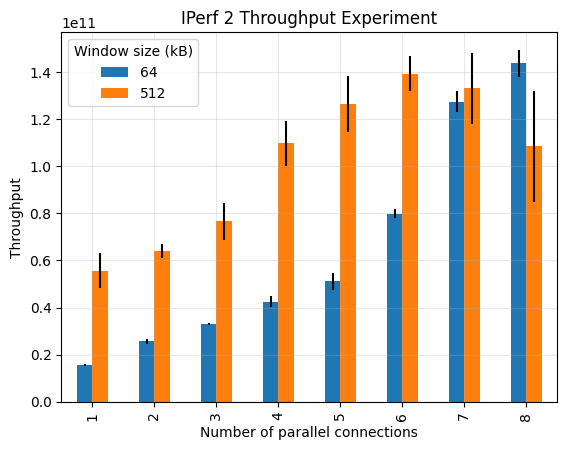

In [4]:
# BAR

for y_var in y_vars:
    values = df.groupby(['PARALLEL', 'WINDOW'])[y_var]
    values.mean().unstack().plot.bar(yerr=values.std().unstack())

    plt.xlabel('Number of parallel connections')
    plt.ylabel(get_name(y_var))
    plt.legend(title='Window size (kB)')
    plt.title('IPerf 2 Throughput Experiment')
    plt.grid(alpha=0.3)

    # plt.savefig(f'iperf-nb_{y_var}.pdf')
    plt.show()